In [16]:
# import bibliotek
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
import json
import string
import morfeusz2
import itertools as it
import operator as op 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# utworzenie korpusu dokumentów
corpus_dir = "./Literatura - streszczenia - oryginał"
corpus = PlaintextCorpusReader(corpus_dir, ".*\.txt")
files = corpus.fileids()
files

['Harry Potter i Czara Ognia.txt',
 'Harry Potter i Insygnia Smierci.txt',
 'Harry Potter i Kamien Filozoficzny.txt',
 'Harry Potter i Komnata Tajemnic.txt',
 'Harry Potter i Ksiaze Polkrwi.txt',
 'Harry Potter i Przeklete Dziecko.txt',
 'Harry Potter i Wiezien Azkabanu.txt',
 'Harry Potter i Zakon Feniksa.txt',
 'Opowiesci z Narni. Kon i jego chlopiec.txt',
 'Opowiesci z Narni. Ksiaze Kaspian.txt',
 'Opowiesci z Narni. Lew, czarownica i stara szafa.txt',
 'Opowiesci z Narni. Ostatnia bitwa.txt',
 'Opowiesci z Narni. Podroz Wedrowca do Switu.txt',
 'Opowiesci z Narni. Siostrzeniec Czarodzieja.txt',
 'Opowiesci z Narni. Srebrne krzeslo.txt',
 'Zmierzch.Ksiezyc w Nowiu.txt',
 'Zmierzch.Przed Switem.txt',
 'Zmierzch.Zacmienie.txt',
 'Zmierzch.Zmierzch.txt',
 'Zmierzch.Zycie i Smierc.txt']

In [ ]:
# wczytanie dokumentów z korpusu do słownika (dictionary)
documents = {}
for file in files:
    documents[file] = corpus.raw(file)
print(json.dumps(documents, indent=4, ensure_ascii=False))

In [4]:
# wczytanie stoplisty z pliku
stoplist_file = open("./stopwords_pl.txt", "r", encoding="UTF-8")
stoplist = stoplist_file.read().splitlines()
stoplist_file.close()
stoplist

['# This file was created from the carrot2 project and is distributed under the BSD license.',
 '# See http://project.carrot2.org/license.html',
 '# Also see http://www.opensource.org/licenses/bsd-license.html',
 '# From trunk/core/carrot2-util-text/src-resources/stopwords.pl',
 'vol',
 'o.o.',
 'mgr',
 'godz',
 'zł',
 'www',
 'pl',
 'ul',
 'tel',
 'hab',
 'prof',
 'inż',
 'dr',
 'i',
 'u',
 'aby',
 'albo',
 'ale',
 'ani',
 'aż',
 'bardzo',
 'bez',
 'bo',
 'bowiem',
 'by',
 'byli',
 'bym',
 'był',
 'była',
 'było',
 'były',
 'być',
 'będzie',
 'będą',
 'chce',
 'choć',
 'co',
 'coraz',
 'coś',
 'czy',
 'czyli',
 'często',
 'dla',
 'do',
 'gdy',
 'gdyby',
 'gdyż',
 'gdzie',
 'go',
 'ich',
 'im',
 'inne',
 'iż',
 'ja',
 'jak',
 'jakie',
 'jako',
 'je',
 'jednak',
 'jednym',
 'jedynie',
 'jego',
 'jej',
 'jest',
 'jeszcze',
 'jeśli',
 'jeżeli',
 'już',
 'ją',
 'kiedy',
 'kilku',
 'kto',
 'która',
 'które',
 'którego',
 'której',
 'który',
 'których',
 'którym',
 'którzy',
 'lat',
 'lecz',

In [5]:
# definicja funkcji do lematyzacji autorstwa Prof. UEK Pawła Wołoszyna
def lemmatize(text):
    morf = morfeusz2.Morfeusz()
    segments = it.groupby(morf.analyse(text),op.itemgetter(0,1))
    def disambiguate(group):
        pairs = ((len(descr),lemma)
        for _, _, (_, lemma, descr, _, _,) in group)
        perpl, lemma = min(pairs)
        return lemma.split(":")[0]
    lemmas = (disambiguate(group) for key, group in segments)
    return " ".join(filter(str.isalpha, lemmas))

In [ ]:
# wstępne przetwarzanie dokumentów tekstowych
for key in documents:
    documents[key] = documents[key].lower()
    documents[key] = "".join([char for char in documents[key] if char not in string.digits])
    documents[key] = "".join([char for char in documents[key] if char not in string.punctuation])
    documents[key] = lemmatize(documents[key])
    documents[key] = " ".join([word for word in word_tokenize(documents[key], language="polish") if word not in stoplist])
    print(json.dumps(documents, indent=4, ensure_ascii=False))

In [9]:
# wczytanie przetworzonych dokumentów ze słownika do obiektu DataFrame
docs = pd.DataFrame.from_dict(documents, orient="index")
docs.columns = ['content']
docs

,content
Harry Potter i Czara Ognia.txt,lord voldemort wraz sługa glizdogonem przybywa...
Harry Potter i Insygnia Smierci.txt,podczas zebranie śmierciożerca odbywać dwór ma...
Harry Potter i Kamien Filozoficzny.txt,ulica privet drive pojawiać stary człowiek dłu...
Harry Potter i Komnata Tajemnic.txt,wuj vernon zły hedwiga robić bałagan dom tymcz...
Harry Potter i Ksiaze Polkrwi.txt,mugolskiego premiera odwiedzać Korneliusz knot...
Harry Potter i Przeklete Dziecko.txt,scena pierwsza druga opowiadać historia zostać...
Harry Potter i Wiezien Azkabanu.txt,Harry leż koc łóżko odrabiać praca domowy zada...
Harry Potter i Zakon Feniksa.txt,dudley zły wyżywać Harry dudley zostawać zaata...
Opowiesci z Narni. Kon i jego chlopiec.txt,akcja książka rozgrywać narnii czas panowanie ...
Opowiesci z Narni. Ksiaze Kaspian.txt,mijać rok wydarzenie opisać powieść lewa czaro...


In [11]:
# utworzenie macierzy częstości ważonej tf
count_vectorizer = CountVectorizer()
counts_tf = count_vectorizer.fit_transform(docs['content'])
counts_tf

<20x4679 sparse matrix of type '<class 'numpy.int64'>'
	with 10004 stored elements in Compressed Sparse Row format>

In [12]:
# utworzenie macierzy częstości ważonej tfidf
tfidf_vectorizer = TfidfVectorizer()
counts_tfidf = tfidf_vectorizer.fit_transform(docs['content'])
counts_tfidf

<20x4679 sparse matrix of type '<class 'numpy.float64'>'
	with 10004 stored elements in Compressed Sparse Row format>

In [14]:
# konwersja macierzy rzadkiej do macierzy klasycznej 
counts_tf_array = counts_tf.toarray()
counts_tfidf_array = counts_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00762313,
        0.        ],
       [0.        , 0.03080895, 0.        , ..., 0.        , 0.01221845,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04319663, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
# parametry topic modelling 
# liczba tematów
topics_count = 4
# lista wszystkich słów w modelu
feature_names = count_vectorizer.get_feature_names_out()
# liczba słów do wyświetlenia
features_count = 20
# liczba i układ wykresów
subplots = [2, 2]

In [19]:
# źródło https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
# definicja funkcji do rysowania wykresów tematów
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(*subplots, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Temat {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [30]:
# zdefiniowanie modelu LDA 
lda = LatentDirichletAllocation(n_components=topics_count, max_iter=10, learning_method="online", learning_offset=50., random_state=0) 

In [31]:
# uczenie modelu LDA
lda.fit(counts_tf)

LatentDirichletAllocation(learning_offset=50.0, n_components=4, random_state=0)

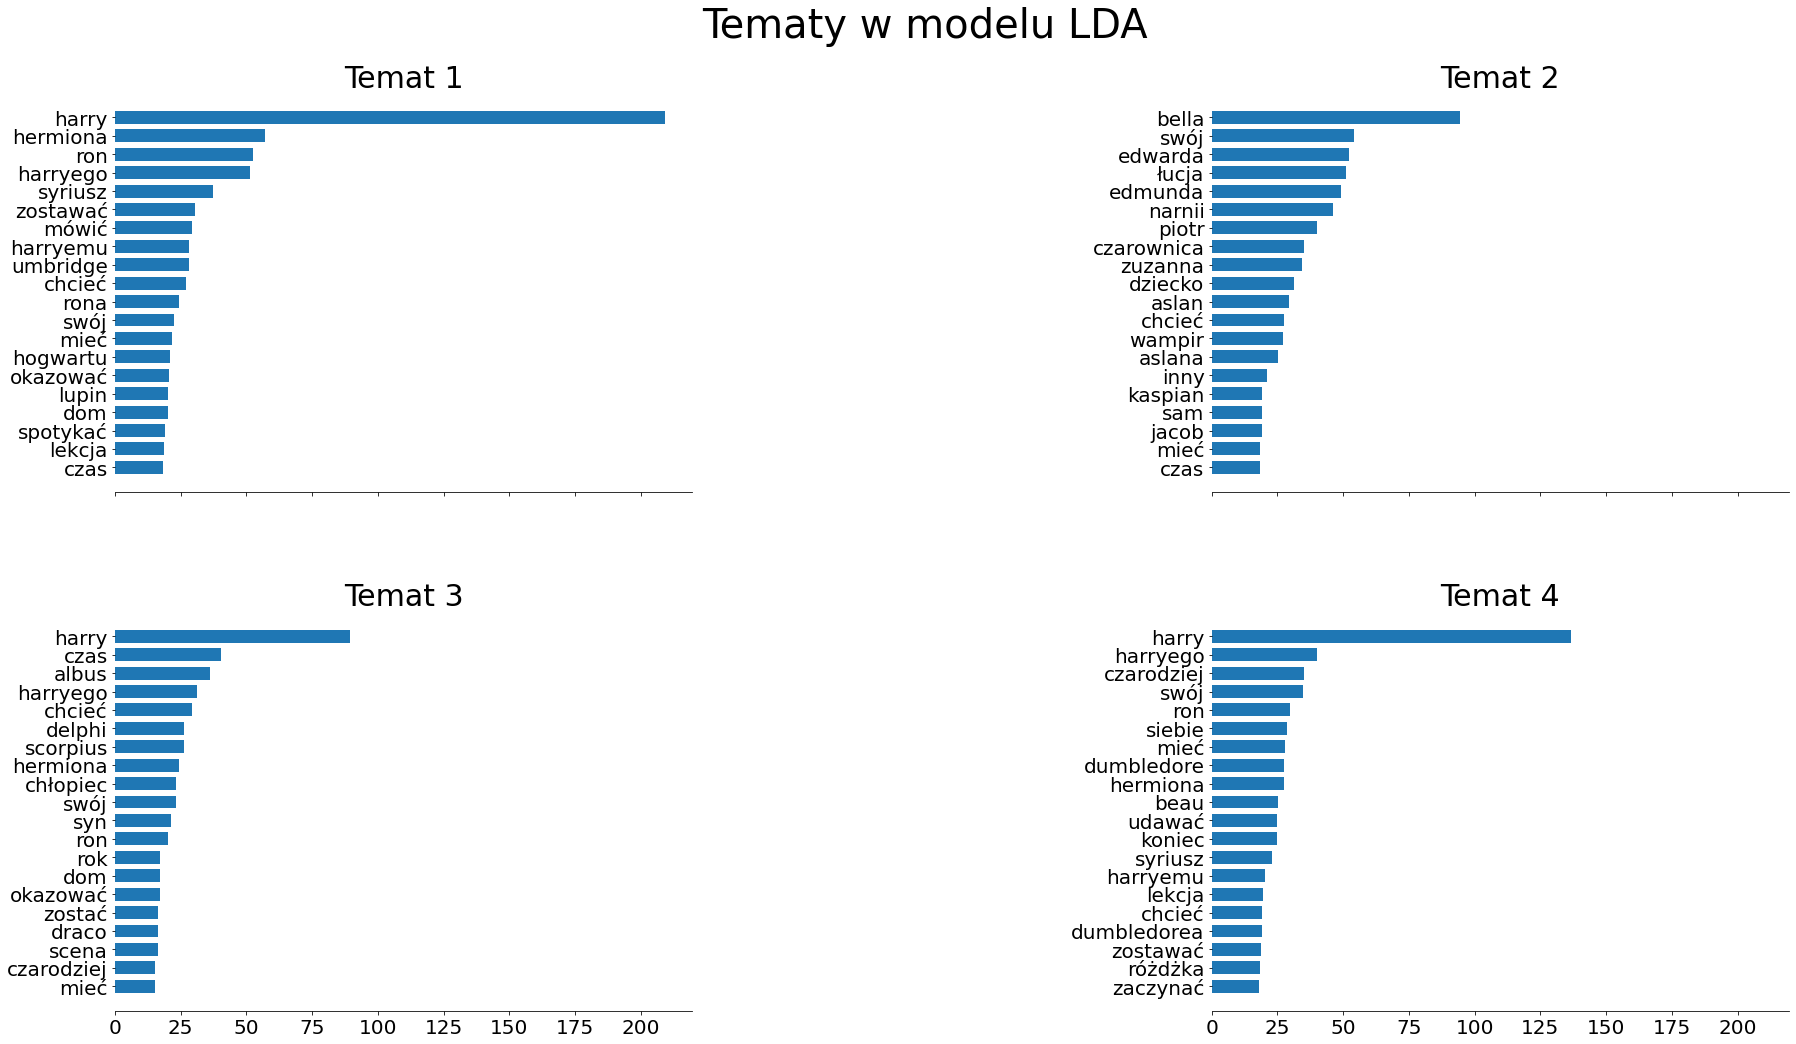

In [32]:
# rysowanine wykresów ważności słów w tematach
plot_top_words(lda, feature_names, features_count, "Tematy w modelu LDA")